In [20]:
import sys
sys.path.append("subspaces")

import torch
import torchvision
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm

%matplotlib inline

# Download MNIST dataset
emnist_train = torchvision.datasets.EMNIST('./emnist', download=True,train=True,split='digits')
emnist_eval = torchvision.datasets.EMNIST('./emnist', download=True,train=False,split='digits')

In [14]:
# Transform data in a tensor of form [batch, image_data]
# Create list of correct_labels for train and eval sets

vector_size = 28*28

train_data = torch.empty(len(emnist_train), vector_size)
train_correct_labels = []

eval_data = torch.empty(len(emnist_eval), vector_size)
eval_correct_labels = []

for i in range(len(emnist_train)):
    train_data[i] = torch.squeeze(torchvision.transforms.functional.to_tensor(emnist_train[i][0])).flatten()
    train_correct_labels.append(emnist_train[i][1])

for i in range(len(emnist_eval)):
    eval_data[i] = torch.squeeze(torchvision.transforms.functional.to_tensor(emnist_eval[i][0])).flatten()
    eval_correct_labels.append(emnist_eval[i][1])

In [21]:
from subspaces.vector_sm import VectorSM

min_energy_list = torch.linspace(0.05, 0.95, 20)
ratio = []
for min_energy in tqdm(min_energy_list):
    # Train with min_energy
    model = VectorSM(vector_size=vector_size)
    model.train(train_data, train_correct_labels, min_energy=min_energy)

    # Predict
    predition_list, prediction_ratio = model.eval(eval_data, eval_correct_labels)
    ratio.append(prediction_ratio)

  0%|          | 0/20 [00:00<?, ?it/s]

StopIteration: 

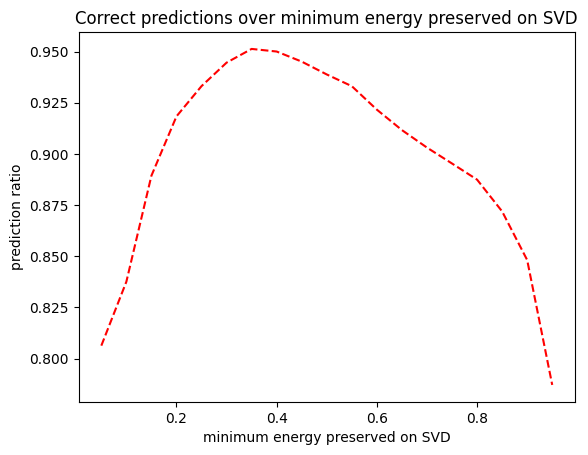

In [23]:
import matplotlib.pyplot as plt

plt.plot(min_energy_list.numpy()[0:19], ratio, 'r--')
plt.title("Correct predictions over minimum energy preserved on SVD")
plt.xlabel("minimum energy preserved on SVD")
plt.ylabel("prediction ratio")
plt.show()

In [ ]:
# Nice.